In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("./data/udemy_courses.csv")

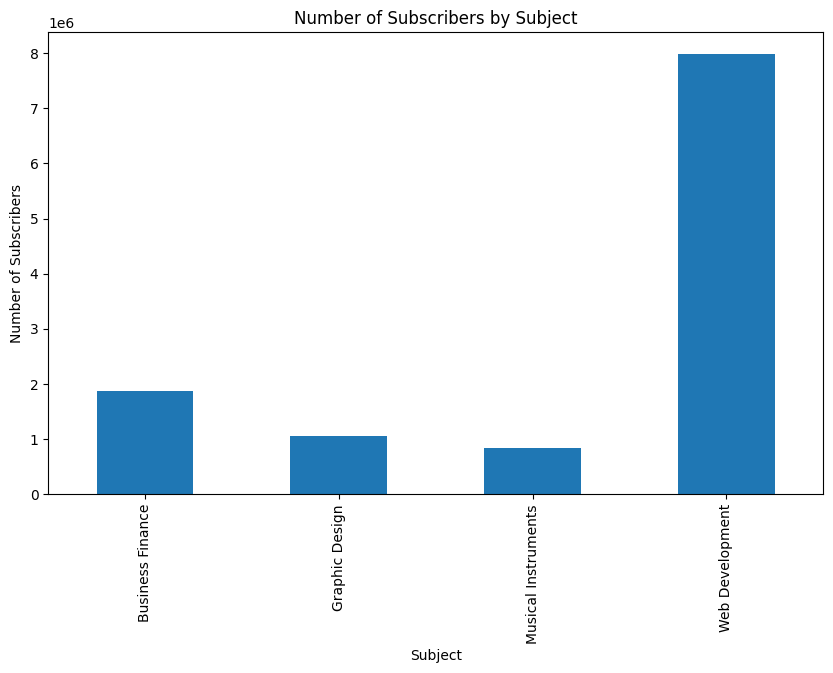

In [24]:
# Visualization 1: Number of Subscribers by Subject
plt.figure(figsize=(10, 6))
df.groupby('subject')['num_subscribers'].sum().plot(kind='bar')
plt.title('Number of Subscribers by Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Subscribers')
plt.show()


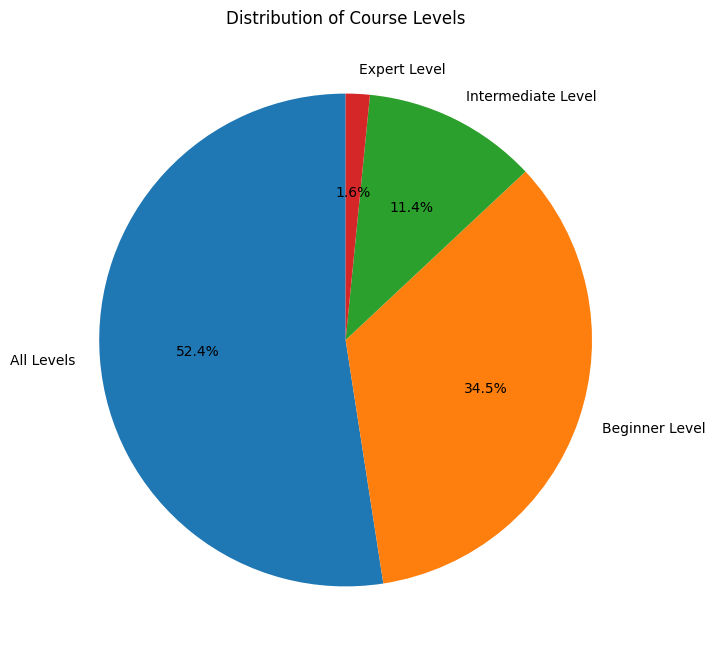

In [25]:
# Visualization 2: Distribution of Course Levels
plt.figure(figsize=(8, 8))
df['level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Course Levels')
plt.ylabel('')
plt.show()


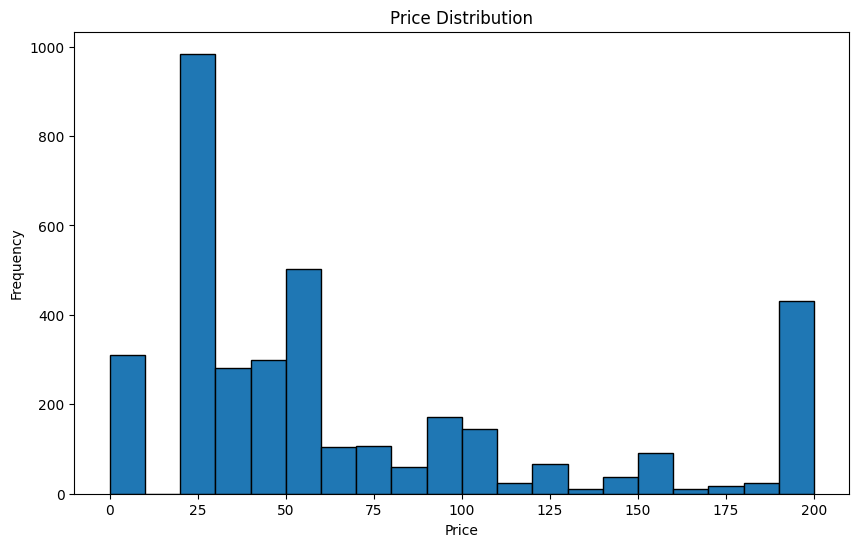

In [26]:
# Visualization 3: Price Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


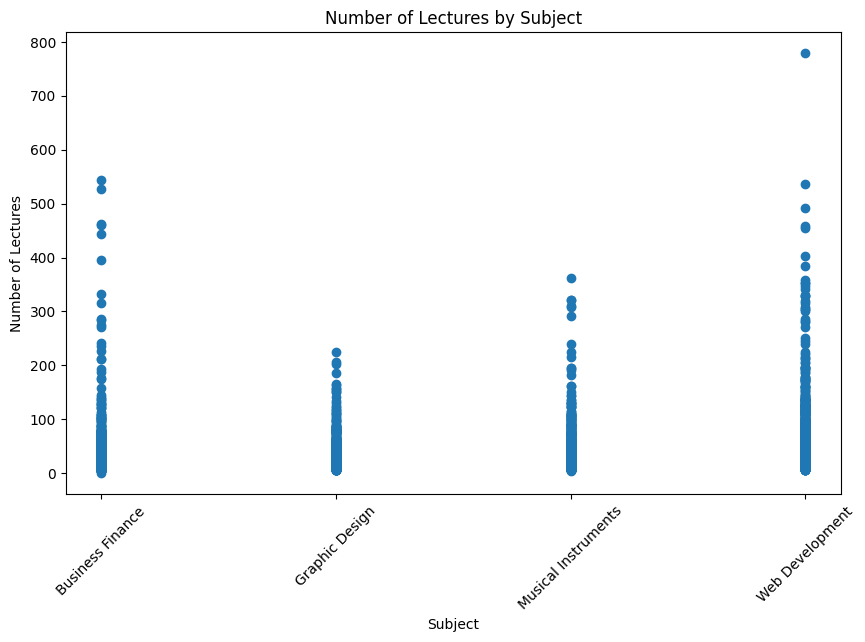

In [27]:

# Visualization 4: Number of Lectures by Subject
plt.figure(figsize=(10, 6))
plt.scatter(df['subject'], df['num_lectures'])
plt.title('Number of Lectures by Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Lectures')
plt.xticks(rotation=45)
plt.show()


In [28]:
features = ['price', 'num_reviews', 'num_lectures', 'content_duration']
target = 'num_subscribers'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 4802.438083790494


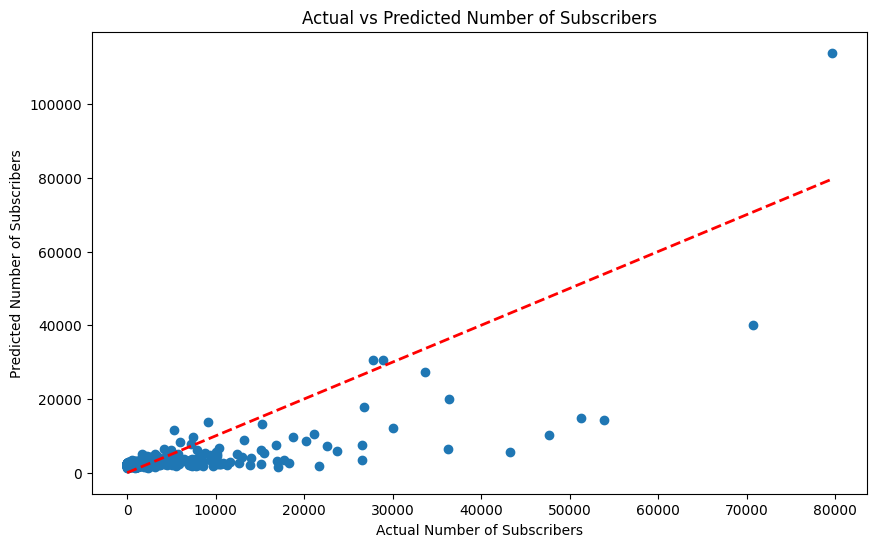

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Number of Subscribers')
plt.xlabel('Actual Number of Subscribers')
plt.ylabel('Predicted Number of Subscribers')
plt.show()


/home/kanishk/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


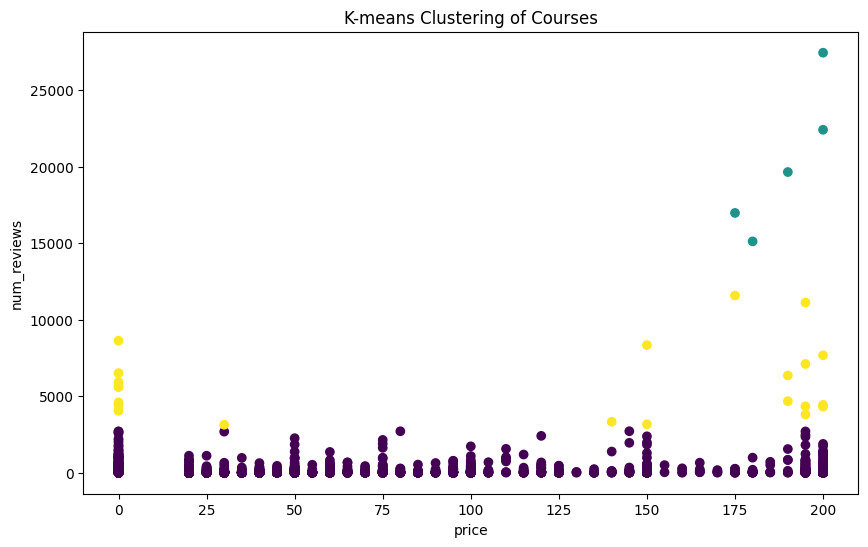

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Select features for clustering
features_for_clustering = ['price', 'num_reviews', 'num_lectures', 'content_duration']

# Fit K-means model
kmeans = KMeans(n_clusters=3, random_state=42)  # You can choose the number of clusters
df['cluster'] = kmeans.fit_predict(df[features_for_clustering])

# Visualization: Scatter plot of two features colored by cluster
plt.figure(figsize=(10, 6))
plt.scatter(df[features_for_clustering[0]], df[features_for_clustering[1]], c=df['cluster'], cmap='viridis')
plt.title('K-means Clustering of Courses')
plt.xlabel(features_for_clustering[0])
plt.ylabel(features_for_clustering[1])
plt.show()


/home/kanishk/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


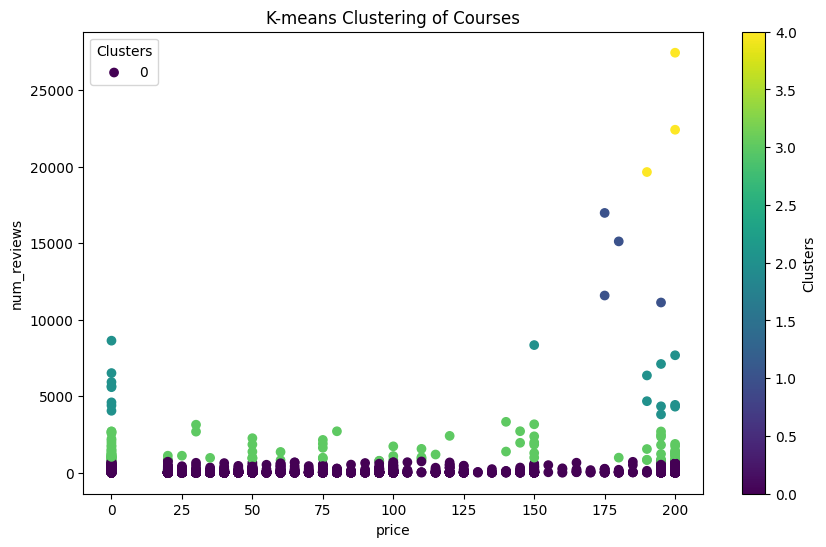